Populating the interactive namespace from numpy and matplotlib


D:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt', 'time', 're']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
No handles with labels found to put in legend.


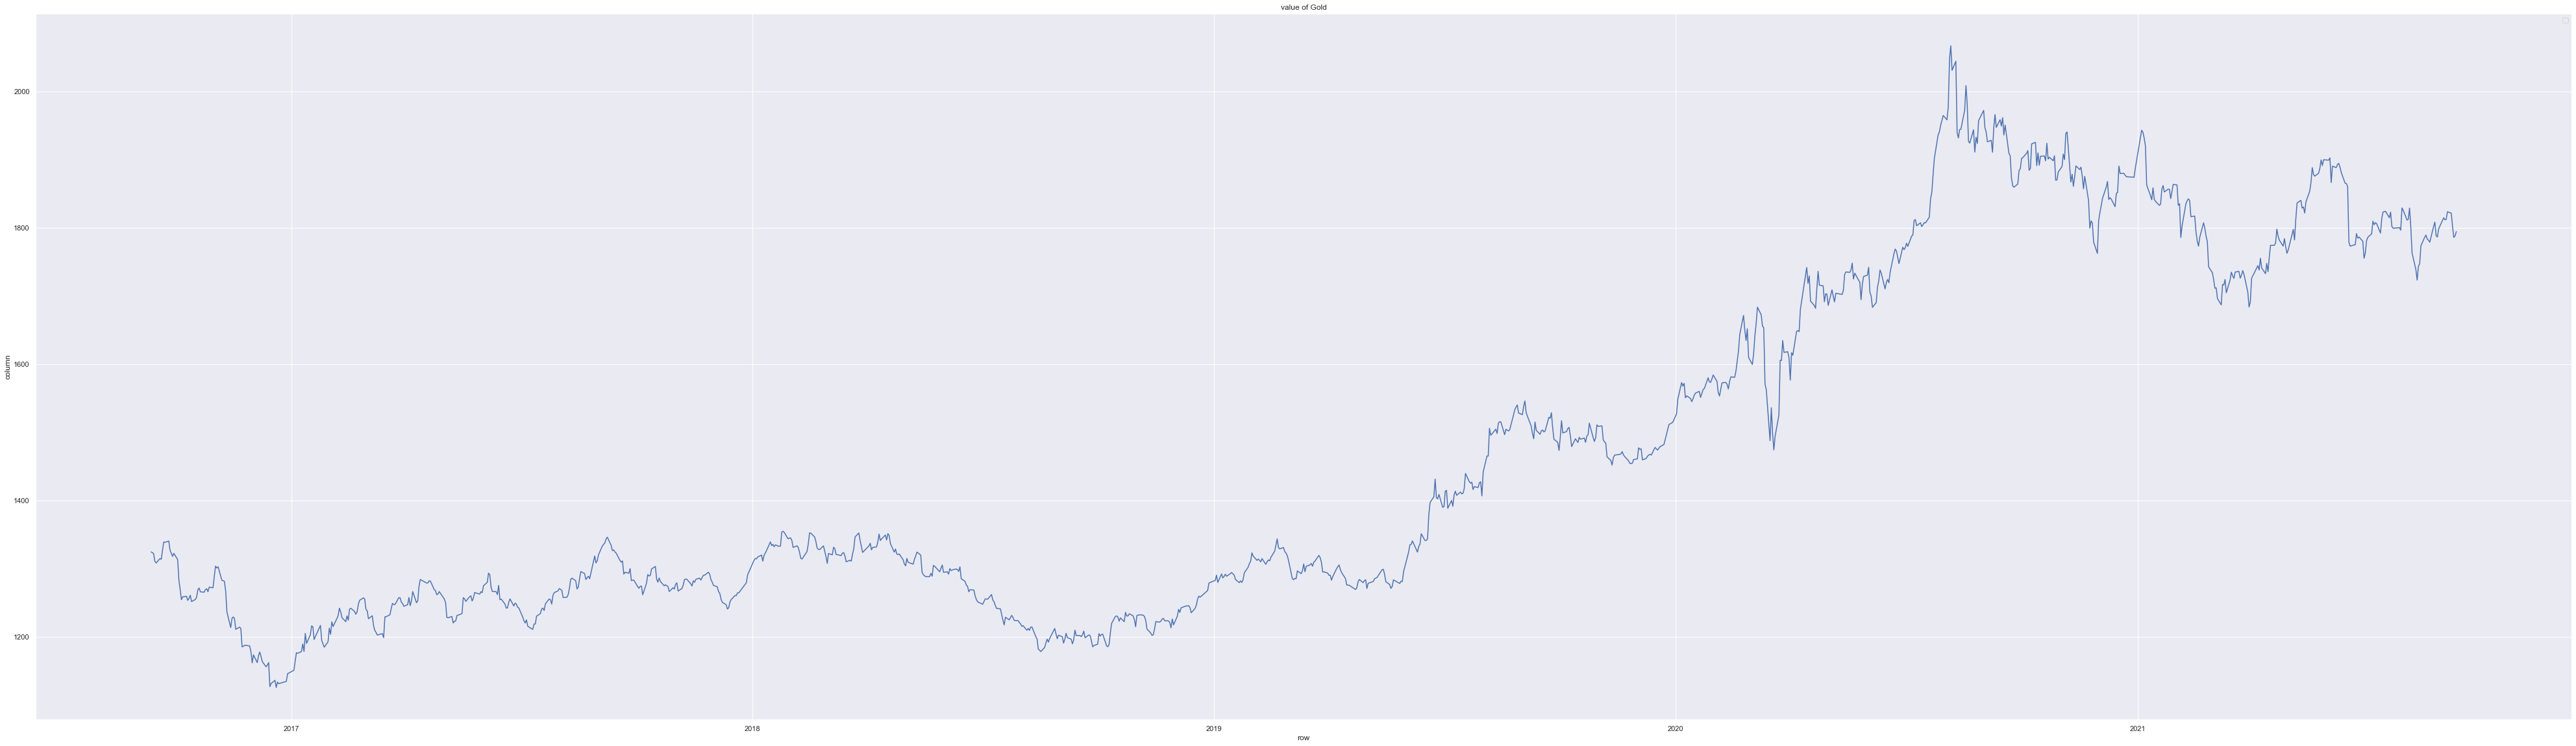

<ipython-input-11-6fa8193b888a>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(gold.dropna().gold,title='ACF of gold').show()


gold的原始ADF检验 (-0.43415247222844333, 0.904238481294166, 23, 1231, {'1%': -3.435673305025808, '5%': -2.863890744031555, '10%': -2.56802156936202}, 9957.827619599739)


<ipython-input-11-6fa8193b888a>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(gold.diff(1).dropna().gold,


gold的一阶ADF检验 (-8.158681091879222, 9.269711421537366e-13, 22, 1231, {'1%': -3.435673305025808, '5%': -2.863890744031555, '10%': -2.56802156936202}, 9948.53365765105)


<ipython-input-11-6fa8193b888a>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(gold.diff(1).dropna().gold,title='first order difference PACF of gold').show()


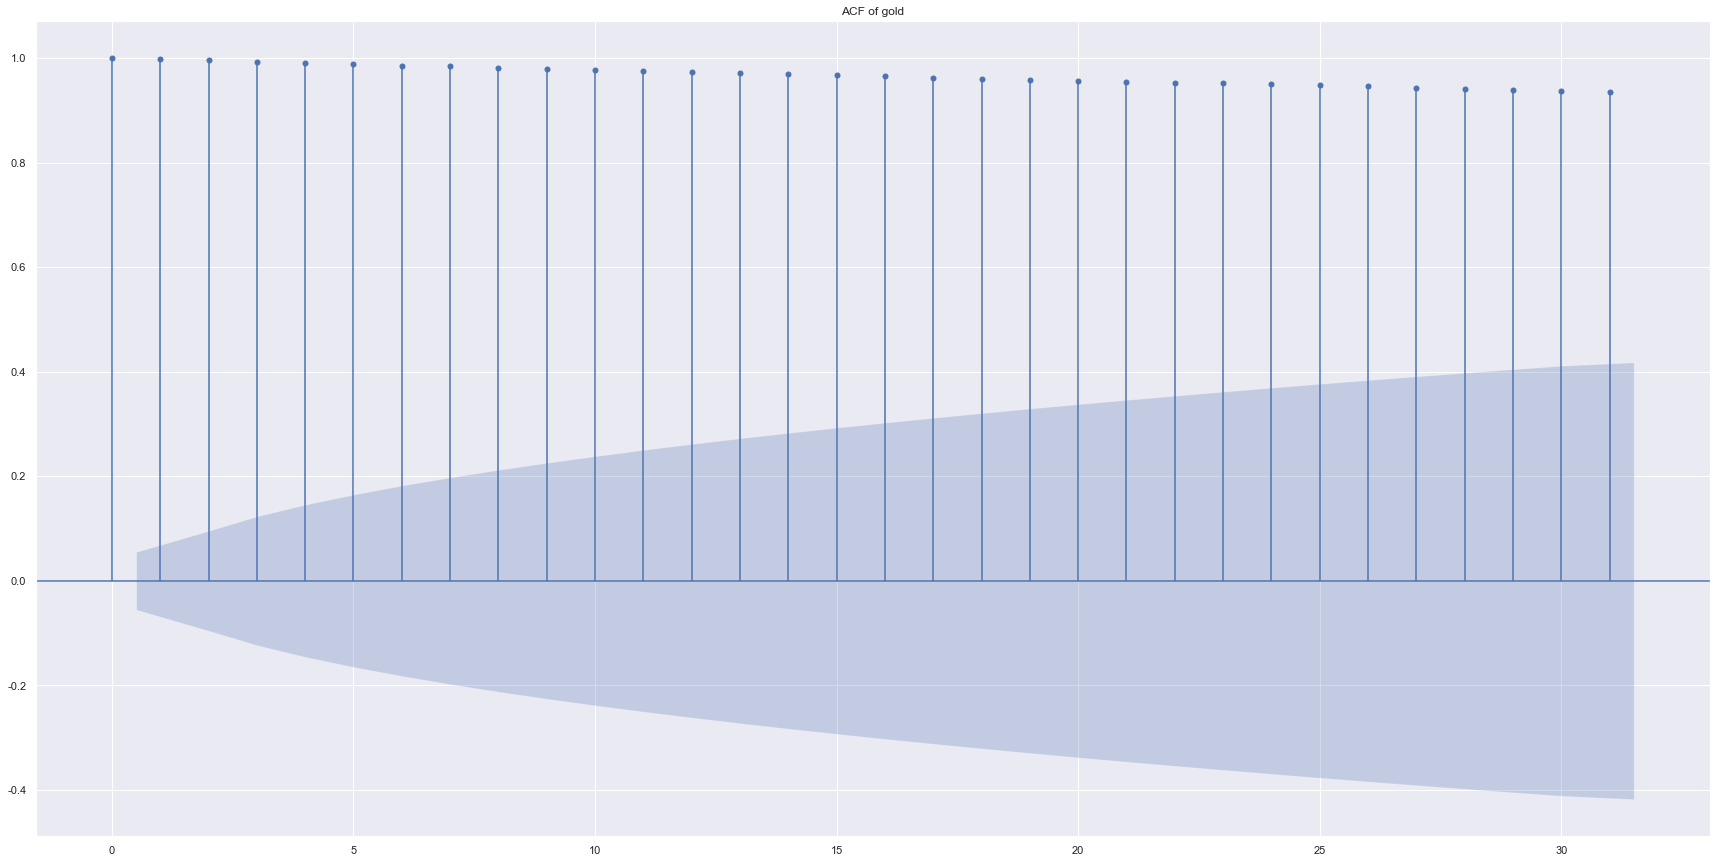

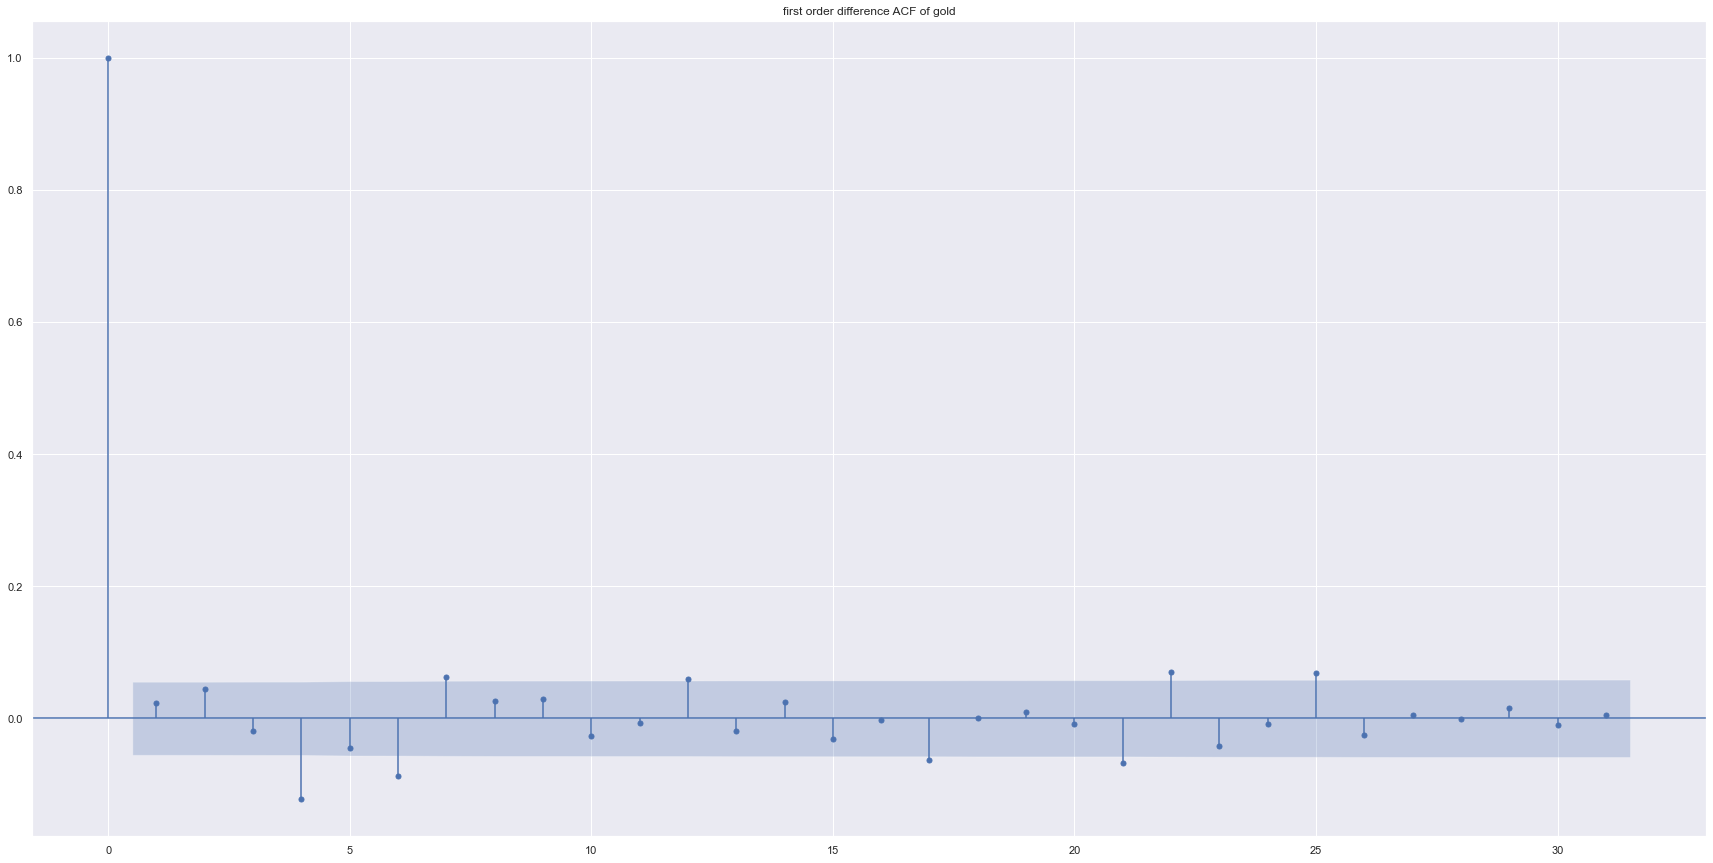

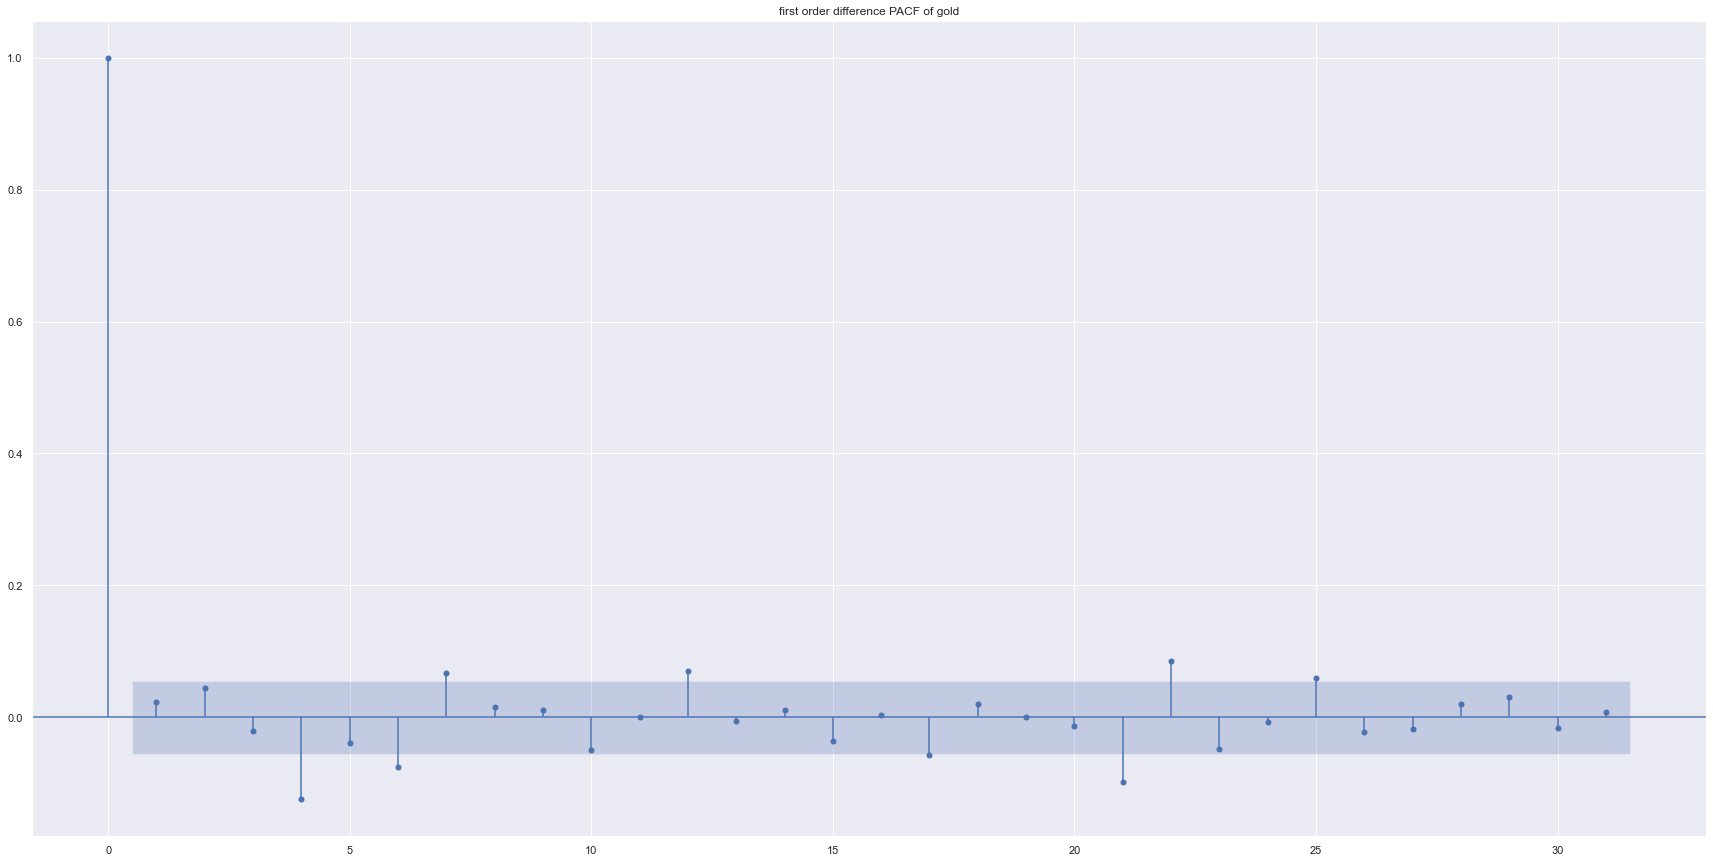

In [11]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  # 自相关图
from statsmodels.tsa.stattools import adfuller as ADF  # 平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf  # 偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
from statsmodels.tsa.arima_model import ARIMA


%matplotlib inline

%pylab inline

#jupyter中文显示是方框，加入下面两行即可显示中文，若嫌麻烦，也可去网上搜索如何永久显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (70, 20)  # 设置输出图片大小
sns.set(color_codes=True)  # seaborn设置背景
gold = pd.read_csv('LBMA-GOLD.csv')
gold = gold.dropna(axis=0, how='any', inplace=False)
gold.Date=pd.to_datetime(gold.Date)
gold.to_csv('test.csv')
plt.plot(gold.Date,gold.gold)
plt.title('value of Gold')
plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show() 

plt.rcParams['figure.figsize'] = (30, 15)  # 设置输出图片大小
plot_acf(gold.dropna().gold,title='ACF of gold').show()
plt.savefig('./img/ACF_gold_原始.jpg')
print(u'gold的原始ADF检验', ADF(gold[u'gold']))
plot_acf(gold.diff(1).dropna().gold,
         title='first order difference ACF of gold').show()
plt.savefig('./img/ACF_gold_一阶差分.jpg')
print(u'gold的一阶ADF检验', ADF(gold.diff(1).dropna()[u'gold']))
plot_pacf(gold.diff(1).dropna().gold,title='first order difference PACF of gold').show()
plt.savefig('./img/PACF_gold_一阶差分.jpg')




In [16]:
print(acorr_ljungbox(bitcoin.bitcoin, lags = [5],boxpierce=True))

(array([6207.69353664]), array([0.]), array([6183.04278856]), array([0.]))


In [12]:
gold_diff=gold.diff(1).dropna()
gold_diff.Date=gold.Date
gold_diff=gold_diff.set_index('Date')
gold_diff.index[0]
gold_diff.to_csv('test.csv')

train_results = statsmodels.tsa.stattools.arma_order_select_ic(
    gold_diff, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in fa

In [13]:
gold_diff.index[0]
train_results



{'aic':               0             1             2             3             4
 0           NaN  10164.300361  10162.819241  10164.730229  10151.762054
 1  10164.243712  10165.781741  10164.804124  10157.800386  10148.950612
 2  10163.695502  10165.615540  10146.386352  10146.217932  10150.119912
 3  10165.188210  10156.511170  10146.896315  10148.942773  10143.758239
 4  10147.966985  10146.617869  10146.314001  10144.515655  10145.175825,
 'bic':               0             1             2             3             4
 0           NaN  10174.568549  10178.221522  10185.266604  10177.432522
 1  10174.511900  10181.184022  10185.340499  10183.470855  10179.755174
 2  10179.097783  10186.151914  10172.056821  10177.022495  10186.058568
 3  10185.724585  10182.181638  10177.700877  10184.881429  10184.830989
 4  10173.637454  10177.422432  10182.252657  10185.588404  10191.382669,
 'aic_min_order': (3, 4),
 'bic_min_order': (2, 2)}

In [8]:
import datetime
time = []
p = []
war=[]
train = gold.set_index('Date')
len(train)

for i in range(20, 1255):

    try:
        model = ARIMA(train[0:i], order=(1, 1, 1)).fit()
        predictions_f_ms = model.predict(i, i+1, dynamic=True, typ='levels')
    except:
        war.append(i)
    time.append( gold_diff.index[i-1])
    p.append(predictions_f_ms.iloc[0])



D:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No

In [10]:
len(time)

1235

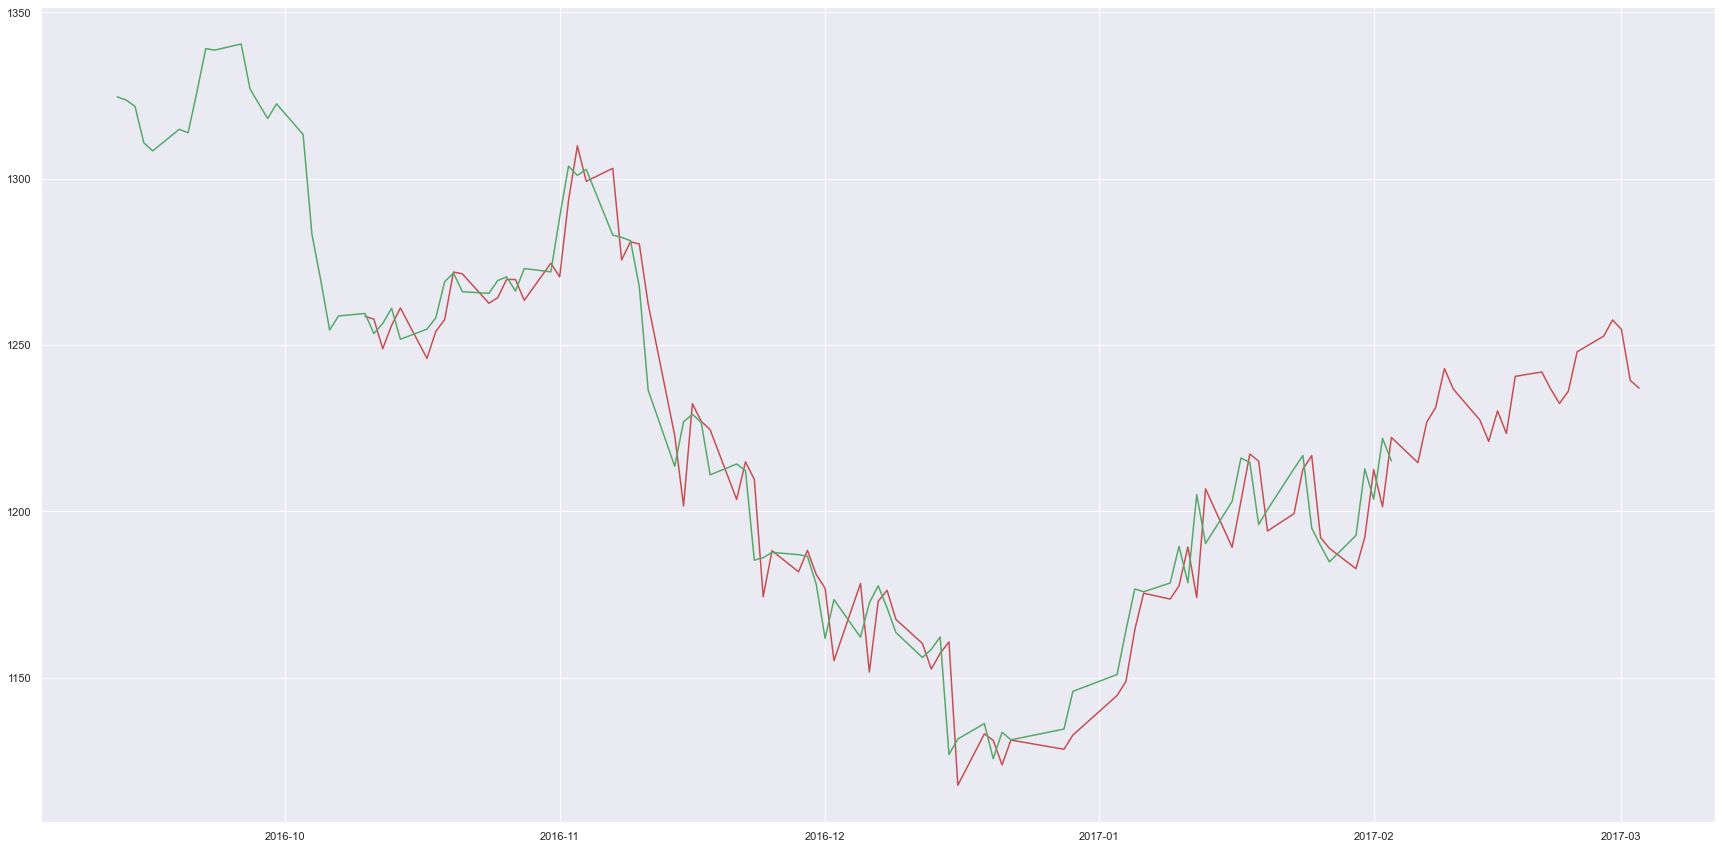

In [7]:
plt.plot(time[:100], p[:100], 'r-', gold.Date[:100], gold.gold[:100], 'g-')
re = pd.DataFrame()
re['Date'] = time
re['Value'] = p
re.to_csv("gold2.csv")